In [1]:
import glob
from pathlib import Path

from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

from fragment_count.utils import (
    filter_no_fragments,
    load_samples_as_data_frame,
    pool,
    pool_and_normalise, 
    pool_timepoints, 
    safe_normalise,
)
from fragment_count.views import plot_distribution_comparison, plot_distribution_errorbar

In [2]:
tumor_normal, tumor_var = load_samples_as_data_frame(glob.glob('fragment_count/output/tumor_derived/*.json'))
chip_normal, chip_var = load_samples_as_data_frame(glob.glob('fragment_count/output/chip/*.json'))

In [3]:
def plot_distributions(distributions):
    plt.rc('font', family='serif')
    fig = plt.figure(figsize=(4, 3))
    lines = ["-","--","-.",":"]
    i = 0
    for label, counts in distributions.items():
        legend_label = label + '\n (n={})'.format(counts.sum().sum())
        density = counts.copy() / sum(counts)
        ax = density.plot(label=legend_label, linestyle=lines[i], linewidth=2.5)
        ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
        i += 1
        
    plt.legend(frameon=False)
    fragment_window = [75, 450]
    plt.xlim(fragment_window)
    plt.xlabel("Fragment size (bp)")
    plt.ylabel("Frequency")

In [4]:
from fragment_count.statistics import kolmogorov_smirnov
kolmogorov_smirnov(pool(tumor_normal), pool(tumor_var))

5.7888246687720786e-232

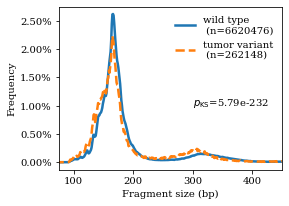

In [18]:
plot_distributions({
    'wild type': pool(tumor_normal),
    'tumor variant': pool(tumor_var),
})
p_value = kolmogorov_smirnov(pool(tumor_normal), pool(tumor_var))
plt.text(300, 0.01, r'$p_{\mathrm{KS}}$' + '={:.2e}'.format(p_value))
filename = 'fragment_count/figs/tumor-wildtype'
plt.savefig(f'{filename}.png', bbox_inches='tight')
plt.savefig(f'{filename}.eps', bbox_inches='tight')

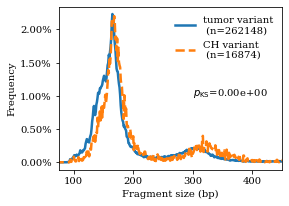

In [19]:
plot_distributions({
    'tumor variant': pool(tumor_var),
    'CH variant': pool(chip_var),
})
p_value = kolmogorov_smirnov(pool(tumor_var), pool(chip_var))
plt.text(300, 0.01, r'$p_{\mathrm{KS}}$' + '={:.2e}'.format(p_value))
filename = 'fragment_count/figs/tumor-chip'
plt.savefig(f'{filename}.png', bbox_inches='tight')
plt.savefig(f'{filename}.eps', bbox_inches='tight')